In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install pystan fbprophet
!pip install neuralprophet

In [4]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
from neuralprophet import NeuralProphet
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import seaborn as sns 

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.




In [5]:
dataset = pd.read_csv('/content/drive/MyDrive/care4better/time_series/kiethtracking.csv',parse_dates=True)

In [6]:
dataset.describe()

,Daily Total Streams
count,173.000000
mean,1273.988439
std,1391.369453
min,0.000000
25%,356.000000
50%,1014.000000
75%,1682.000000
max,9724.000000


In [7]:
dataset['Date'] = pd.to_datetime(dataset['Date'],format='%Y-%m-%d')
dataset.head(169)

,Date,Daily Total Streams
0,2021-05-19,0
1,2021-05-20,0
2,2021-05-21,0
3,2021-05-22,0
4,2021-05-23,0
...,...,...
164,2021-10-30,2121
165,2021-10-31,2472
166,2021-11-01,1860
167,2021-11-02,1408


In [8]:
df = dataset

In [9]:
df = df.rename(columns={'Date': 'ds',
                        'Daily Total Streams': 'y'})
df.head()

,ds,y
0,2021-05-19,0
1,2021-05-20,0
2,2021-05-21,0
3,2021-05-22,0
4,2021-05-23,0


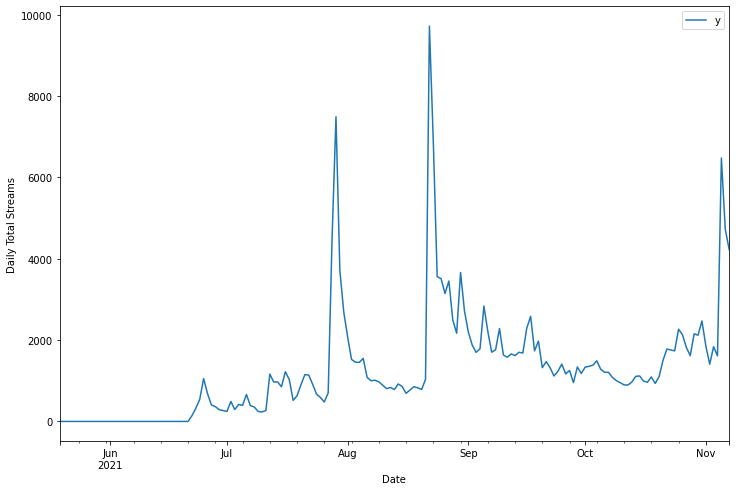

In [10]:
ax = df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Daily Total Streams')
ax.set_xlabel('Date')

plt.show()

In [11]:
model = Prophet(interval_width=0.95)
model.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [12]:
pred = model.make_future_dataframe(periods=365,freq='D')
forecast = model.predict(pred)

forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
533,2022-11-03,4634.613081,1413.016190,7821.216386,2395.491611,6826.000460,54.813076,54.813076,54.813076,54.813076,54.813076,54.813076,0.0,0.0,0.0,4689.426157
534,2022-11-04,4641.466722,1527.317991,8006.415306,2391.307192,6843.502127,120.265482,120.265482,120.265482,120.265482,120.265482,120.265482,0.0,0.0,0.0,4761.732204
535,2022-11-05,4648.320364,1357.384008,7655.529067,2387.122773,6860.901288,-99.382840,-99.382840,-99.382840,-99.382840,-99.382840,-99.382840,0.0,0.0,0.0,4548.937524
536,2022-11-06,4655.174005,1575.204827,8128.359247,2382.939431,6876.174424,192.383409,192.383409,192.383409,192.383409,192.383409,192.383409,0.0,0.0,0.0,4847.557414
537,2022-11-07,4662.027646,1350.011767,8038.202410,2378.759472,6890.432626,8.949326,8.949326,8.949326,8.949326,8.949326,8.949326,0.0,0.0,0.0,4670.976972


In [75]:
result = forecast[['ds','yhat']]
final_result =result[0:]
final_result #values of upcoming one year


,ds,yhat
0,2021-11-08,2176.251518
1,2021-11-09,1955.875123
2,2021-11-10,2122.261732
3,2021-11-11,2242.676192
4,2021-11-12,2314.982239
...,...,...
360,2022-11-03,4689.426157
361,2022-11-04,4761.732204
362,2022-11-05,4548.937524
363,2022-11-06,4847.557414


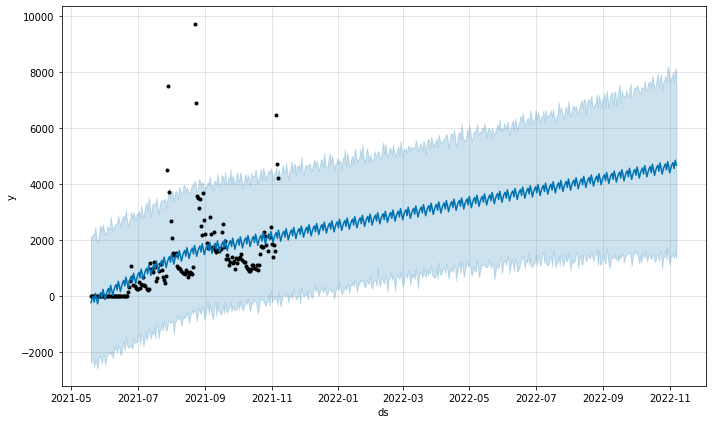

In [14]:
plot1 = model.plot(forecast) #visualization of the predicted model

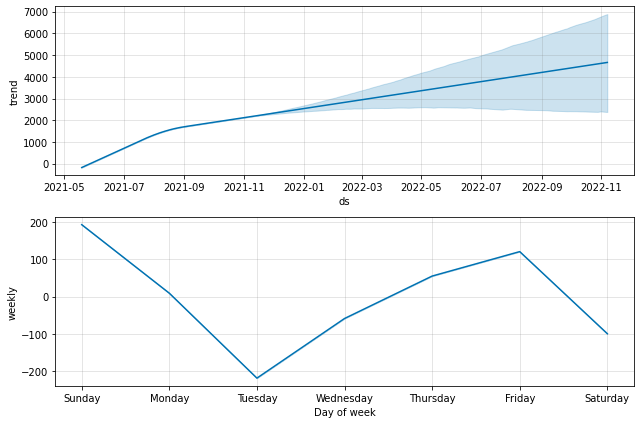

In [15]:
plot2 = model.plot_components(forecast)

Neural Prophet

In [80]:
neural_model = NeuralProphet()
neural_model.fit(df,freq='D',epochs=5000)

INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO:NP.utils:Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO:NP.config:Auto-set batch_size to 16


  0%|          | 0/213 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.43E-02, min: 3.45E-01
INFO:NP.utils_torch:lr-range-test results: steep: 4.43E-02, min: 3.45E-01
INFO - (NP.utils_torch.lr_range_test) - learning rate range test selected lr: 1.74E-01
INFO:NP.utils_torch:learning rate range test selected lr: 1.74E-01
Epoch[5000/5000]: 100%|██████████| 5000/5000 [02:02<00:00, 40.74it/s, SmoothL1Loss=0.0292, MAE=467, MSE=8.54e+5, RegLoss=0]


,SmoothL1Loss,MAE,MSE,RegLoss
0,0.563365,3480.761603,1.931818e+07,0.0
1,0.534436,3357.826079,1.816123e+07,0.0
2,0.506872,3240.750082,1.705136e+07,0.0
3,0.479528,3121.709532,1.598134e+07,0.0
4,0.453392,3006.610892,1.498230e+07,0.0
...,...,...,...,...
4995,0.029242,467.055218,8.540190e+05,0.0
4996,0.029242,467.054749,8.540189e+05,0.0
4997,0.029242,467.054162,8.540188e+05,0.0
4998,0.029242,467.054002,8.540188e+05,0.0


In [81]:
future = neural_model.make_future_dataframe(df,periods=365)
frcst = model.predict(future)

frcst.tail(50)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
315,2022-09-19,4326.199220,1572.424802,7356.655222,2444.593503,6169.276643,8.949326,8.949326,8.949326,8.949326,8.949326,8.949326,0.0,0.0,0.0,4335.148546
316,2022-09-20,4333.052861,1216.981238,7105.165452,2438.849158,6183.363254,-218.280711,-218.280711,-218.280711,-218.280711,-218.280711,-218.280711,0.0,0.0,0.0,4114.772151
317,2022-09-21,4339.906503,1419.937165,7176.423134,2432.719102,6199.357945,-58.747742,-58.747742,-58.747742,-58.747742,-58.747742,-58.747742,0.0,0.0,0.0,4281.158760
318,2022-09-22,4346.760144,1624.560377,7431.687931,2426.657451,6215.352636,54.813076,54.813076,54.813076,54.813076,54.813076,54.813076,0.0,0.0,0.0,4401.573220
319,2022-09-23,4353.613785,1788.687832,7301.481960,2420.656073,6230.666724,120.265482,120.265482,120.265482,120.265482,120.265482,120.265482,0.0,0.0,0.0,4473.879267
320,2022-09-24,4360.467427,1254.202577,7187.098720,2415.010607,6244.727577,-99.382840,-99.382840,-99.382840,-99.382840,-99.382840,-99.382840,0.0,0.0,0.0,4261.084587
321,2022-09-25,4367.321068,1660.382685,7709.311864,2409.430544,6258.788430,192.383409,192.383409,192.383409,192.383409,192.383409,192.383409,0.0,0.0,0.0,4559.704477
322,2022-09-26,4374.174709,1567.018404,7307.231026,2405.447850,6274.157802,8.949326,8.949326,8.949326,8.949326,8.949326,8.949326,0.0,0.0,0.0,4383.124035
323,2022-09-27,4381.028351,1120.152407,7134.371553,2403.523595,6290.991531,-218.280711,-218.280711,-218.280711,-218.280711,-218.280711,-218.280711,0.0,0.0,0.0,4162.747640
324,2022-09-28,4387.881992,1247.728688,7216.045966,2401.599339,6307.825259,-58.747742,-58.747742,-58.747742,-58.747742,-58.747742,-58.747742,0.0,0.0,0.0,4329.134250


In [82]:
rslt = forecast[0:]
re = rslt[['ds','yhat']]
re.head()

,ds,yhat
0,2021-11-08,2176.251518
1,2021-11-09,1955.875123
2,2021-11-10,2122.261732
3,2021-11-11,2242.676192
4,2021-11-12,2314.982239


In [83]:
final_result = final_result.reset_index(drop=True)
final_result['neural_yhat'] = re['yhat']
final_result

,ds,yhat,neural_yhat
0,2021-11-08,2176.251518,2176.251518
1,2021-11-09,1955.875123,1955.875123
2,2021-11-10,2122.261732,2122.261732
3,2021-11-11,2242.676192,2242.676192
4,2021-11-12,2314.982239,2314.982239
...,...,...,...
360,2022-11-03,4689.426157,4689.426157
361,2022-11-04,4761.732204,4761.732204
362,2022-11-05,4548.937524,4548.937524
363,2022-11-06,4847.557414,4847.557414


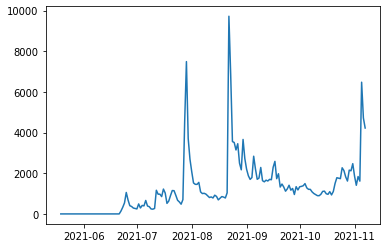

In [79]:
plt.plot(df['ds'],df['y'])

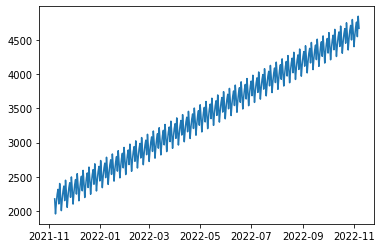

In [78]:
plt.plot(re['ds'],re['yhat'])

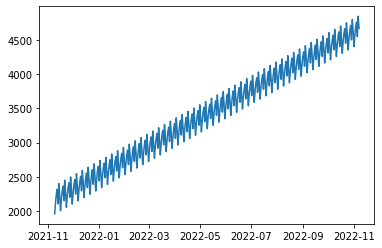

In [40]:
plt.plot(final_result['ds'],final_result['yhat'])

In [59]:
len(final_result)

364